# **Red convolucional para clasificación de emociones en rostros humanos**

### **PASO 1:** Importar Dataset desde Kaggle.

Dataset: https://www.kaggle.com/datasets/msambare/fer2013/data

Inicialmente se debe tener la key de la API de Kaggle para descargar localmente el dataset.

**Librerias**

In [58]:
import os
import cv2
import pandas as pd
import sklearn as skl
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time
from sklearn.metrics import confusion_matrix

###1.1 preparación del entorno en Google Colab para interactuar con Kaggle:





**!important** - El archivo 'Kaggle.json' que contiene el key y es solicitado se anexo en el repositorio.

In [59]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juandavidrios","key":"a44d3cd957d2f83bc0f09b227729fd44"}'}

In [60]:
!mkdir -p /content/.kaggle
!mv kaggle.json /content/.kaggle/


In [61]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 /content/.kaggle/kaggle.json

In [62]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/.kaggle'



###1.2 Descargar el dataset

In [63]:
!kaggle datasets download -d msambare/fer2013

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


###1.3 Descomprimir el Dataset y crear directorio de datos

**!importnat** - En caso de solicitarlo ingresar la letra A para descomprimir todos los archivos.

In [64]:
!unzip /content/fer2013.zip -d /content/fer2013/



Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/fer2013/train/sad/Training_65242339.jpg  
  inflating: /content/fer2013/train/sad/Training_65267116.jpg  
  inflating: /content/fer2013/train/sad/Training_65275626.jpg  
  inflating: /content/fer2013/train/sad/Training_6529266.jpg  
  inflating: /content/fer2013/train/sad/Training_65329617.jpg  
  inflating: /content/fer2013/train/sad/Training_65338712.jpg  
  inflating: /content/fer2013/train/sad/Training_65338797.jpg  
  inflating: /content/fer2013/train/sad/Training_65387162.jpg  
  inflating: /content/fer2013/train/sad/Training_65404494.jpg  
  inflating: /content/fer2013/train/sad/Training_65426218.jpg  
  inflating: /content/fer2013/train/sad/Training_65430136.jpg  
  inflating: /content/fer2013/train/sad/Training_65437377.jpg  
  inflating: /content/fer2013/train/sad/Training_6545735.jpg  
  inflating: /content/fer2013/train/sad/Training_65463385.jpg  
  inflating: /content/fer2013/train/sad/Train

In [65]:
!ls /content/fer2013/

test  train


In [66]:

dataset_dir = '/content/fer2013/'

### **PASO-2:** Lectura y etiquetado de imagenes.

###2.1 lectura y etiquetado

In [67]:
# Crear listas para almacenar las imágenes y etiquetas
images = []
labels = []

In [68]:
# Diccionario de etiquetas
emotion_labels = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

###2.2 Redimensión a 48px y conversión a escala de grises

In [69]:
image_size = 48  # Tamaño deseado de las imágenes

In [70]:
for emotion, label in emotion_labels.items():
    emotion_dir = os.path.join(dataset_dir, 'train', emotion)
    for filename in os.listdir(emotion_dir):
        image_path = os.path.join(emotion_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer la imagen en escala de grises
        image = cv2.resize(image, (image_size, image_size))  # Redimensionar a 48x48 píxeles
        images.append(image)
        labels.append(label)

In [71]:
# Convertir las listas en matrices NumPy
images = np.array(images)
labels = np.array(labels)


In [72]:
# Normalizar los píxeles en el rango [0, 1]
images = images / 255.0

###2.3 crear conjuntos de entrenamiento y prueba

In [73]:
# Dividir el conjunto de datos en entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


### **PASO-3:** Crear el modelo de red convolucional.





###3.1 modelo de red neuronal convolucional

In [74]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
])

###3.2 Compilación y entrenamiento del modelo

In [75]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [76]:
# Entrenar el modelo
history = model.fit(train_images.reshape(-1, 48, 48, 1), train_labels, epochs=12, batch_size=64,
                    validation_data=(test_images.reshape(-1, 48, 48, 1), test_labels))


Epoch 1/12
359/359 [==============================] - 93s 257ms/step - loss: 1.6961 - accuracy: 0.3169 - val_loss: 1.5357 - val_accuracy: 0.4124
Epoch 2/12
359/359 [==============================] - 88s 246ms/step - loss: 1.4491 - accuracy: 0.4490 - val_loss: 1.4189 - val_accuracy: 0.4532
Epoch 3/12
359/359 [==============================] - 86s 240ms/step - loss: 1.3116 - accuracy: 0.4987 - val_loss: 1.3176 - val_accuracy: 0.5007
Epoch 4/12
359/359 [==============================] - 89s 248ms/step - loss: 1.2126 - accuracy: 0.5420 - val_loss: 1.2690 - val_accuracy: 0.5160
Epoch 5/12
359/359 [==============================] - 88s 247ms/step - loss: 1.1301 - accuracy: 0.5749 - val_loss: 1.2467 - val_accuracy: 0.5300
Epoch 6/12
359/359 [==============================] - 88s 246ms/step - loss: 1.0471 - accuracy: 0.6064 - val_loss: 1.2232 - val_accuracy: 0.5406
Epoch 7/12
359/359 [==============================] - 86s 239ms/step - loss: 0.9546 - accuracy: 0.6433 - val_loss: 1.2581 - val_ac

###3.3 Precisión del conjunto de prueba

In [77]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images.reshape(-1, 48, 48, 1), test_labels)
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

180/180 [==============================] - 7s 41ms/step - loss: 1.6905 - accuracy: 0.5453
Precisión en el conjunto de prueba: 0.545280396938324


### **PASO-4:** Metricas de Desempeño

### 4.1 Matriz de confusión

180/180 [==============================] - 5s 28ms/step


<Figure size 800x800 with 0 Axes>

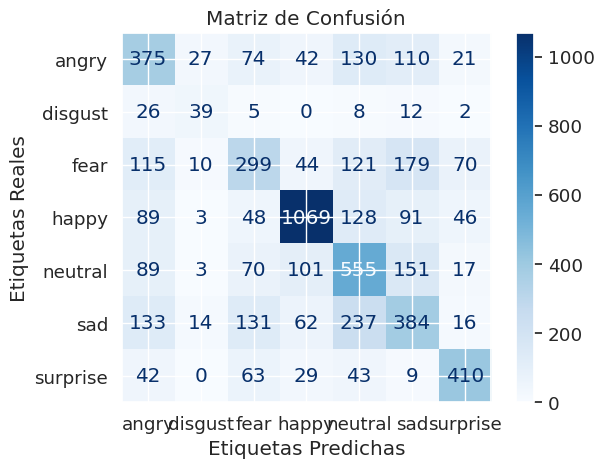

In [78]:
# Obtener las probabilidades predichas por el modelo en el conjunto de prueba
y_prob = model.predict(test_images.reshape(-1, 48, 48, 1))

# Obtener las etiquetas predichas tomando la clase con la probabilidad máxima
y_pred = np.argmax(y_prob, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels.keys())
disp.plot(cmap='Blues', values_format='d')

plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')

plt.show()



###4.2 Reporte de Clasificación

In [79]:
# Imprimir el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(test_labels, y_pred, target_names=emotion_labels.keys()))


Reporte de Clasificación:
              precision    recall  f1-score   support

       angry       0.43      0.48      0.46       779
     disgust       0.41      0.42      0.41        92
        fear       0.43      0.36      0.39       838
       happy       0.79      0.73      0.76      1474
     neutral       0.45      0.56      0.50       986
         sad       0.41      0.39      0.40       977
    surprise       0.70      0.69      0.70       596

    accuracy                           0.55      5742
   macro avg       0.52      0.52      0.52      5742
weighted avg       0.55      0.55      0.55      5742



###4.3 Graficos de Perdida y Presición

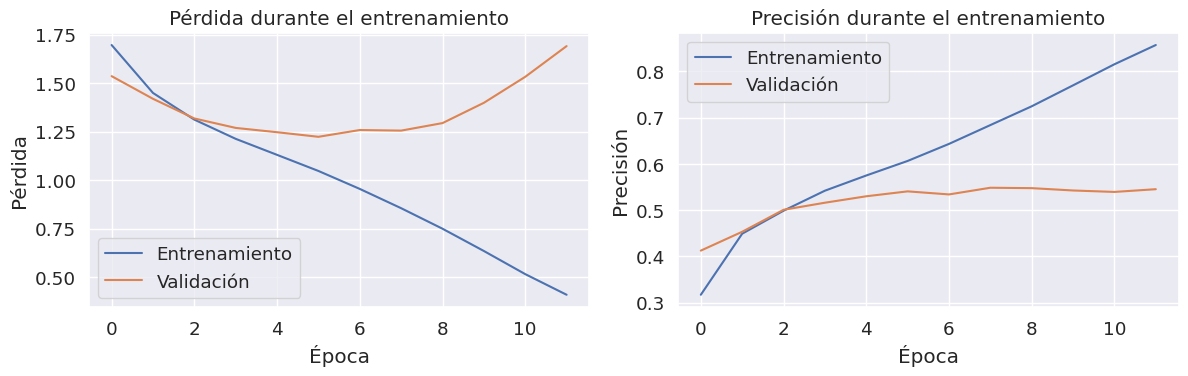

In [80]:
# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 4))

# Graficar la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


### **PASO-5:** Metricas de Negocio.

### 5.1 Tiempo de Inferencia

In [81]:
sample_images = test_images[:10]  # Tomar las primeras 10 imágenes como ejemplo
sample_images_reshaped = sample_images.reshape(-1, 48, 48, 1)

# Medir el tiempo de inferencia para las muestras de prueba
start_time = time.time()
predictions = model.predict(sample_images_reshaped)
end_time = time.time()

# Calcular el tiempo promedio por predicción
average_inference_time = (end_time - start_time) / len(sample_images)

print(f"Tiempo de Inferencia Promedio por Predicción: {average_inference_time} segundos")


1/1 [==============================] - 0s 45ms/step
Tiempo de Inferencia Promedio por Predicción: 0.010672926902770996 segundos


###5.2 Sensibilidad y Especificidad

In [82]:
# Obtener la matriz de confusión
cm = confusion_matrix(test_labels, y_pred)

# Calcular sensibilidad y especificidad
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f"Sensibilidad: {sensitivity}")
print(f"Especificidad: {specificity}")


Sensibilidad: 0.6
Especificidad: 0.9328358208955224
